# Contents
- Proton Population
  - plots to understand the functions
  - played with different integration methods
- Primary Electron Population
  - Simple Power Law
  - Norm is left as 1
- Synchrotron
  - Plot different Synchrotron functions to understand them
  - Do NOT play with ClusterEmission Class yet
- Coma Data
  - Plot along with secondary Electron population


In [1]:
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as const
from astropy.wcs import WCS
from ClusterModel import model

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster(name='Coma', 
                      redshift=0.023, M500=7e14*u.Msun, 
                      cosmology=cosmo, silent=False, 
                      output_dir='/home/astrogamma/Project/Output/TestClusterModel')


                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.


## First understand the Proton Population

### Nice cluster's Parameters
#### Thermal:
You need an ICM model: beta, gnfw... 
#### CR:
For spectrum protons, there is a model defined! simple power law. 

Spectrum crp model defines the energy shape

In [3]:
#----- Some parameters that can be set at when defining the cluster
clust.coord = SkyCoord("194.953d  27.9806d", frame="icrs", unit="deg")

#----- Define the relevant ICM model (available models are defined in model_modpar.py)

# Density profile of the target thermal gas
clust.density_gas_model = {'name':'beta', 'n_0':3e-3*u.cm**-3, 'beta':2.0/3, 'r_c':290*u.kpc}

# Pressure profile of the target thermal gas
clust.pressure_gas_model = {'name':'GNFW', 'P_0':2.2e-2*u.keV/u.cm**3, 'c500':2.9, 'a':1.8, 'b':3.1, 'c':0.0}

# Set the cosmic ray density profile to the same shape as the thermal gas density
clust.set_density_crp_isodens_scal_param()

# Cosmic ray proton spectrum
clust.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.3}

# Cosmic ray proton normalization
clust.X_cr_E = {'X':0.01, 'R_norm':clust.R500} # X is the CRp/thermal energy ratio, normalized within R_norm

Setting coord value
Setting density_gas_model value
Fixing: R500
Setting pressure_gas_model value
Fixing: R500
Setting spectrum_crp_model value
Getting R500 value
Setting cosmic ray to thermal pressure ratio value


### Proton Density and Spectrum

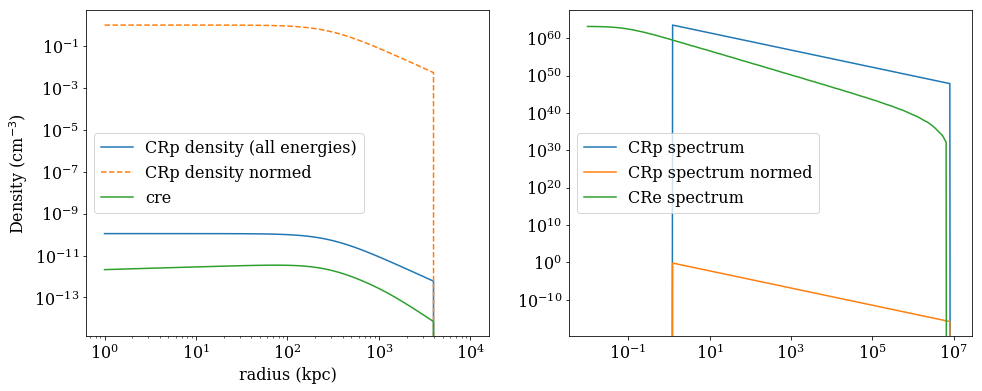

In [68]:
plt.figure(figsize=(15,6))
plt.subplot(121)

r, n_crp_r = clust.get_density_crp_profile()
plt.loglog(r, n_crp_r, label='CRp density (all energies)')
r, n_crp_r = clust.get_density_crp_profile(Emin=100*u.GeV, Emax=100*u.PeV)
#plt.loglog(r, n_crp_r, '--', label='CRp density (100 GeV < E < 100 PeV)')
r, n_crp_r2 = clust.get_normed_density_crp_profile()
plt.loglog(r, n_crp_r2, '--', label='CRp density normed')
r, n_cre = clust.get_density_cre_profile()
plt.loglog(r, n_cre, label = "cre")
plt.xlabel('radius (kpc)')
plt.ylabel('Density (cm$^{-3}$)')
plt.legend()


plt.subplot(122)
r, n_crp_r = clust.get_crp_spectrum()
plt.loglog(r, n_crp_r,  label='CRp spectrum')
r, n_crp_r = clust.get_normed_crp_spectrum()
plt.loglog(r, n_crp_r, label = 'CRp spectrum normed')
r, n_cre_r = clust.get_cre_spectrum()
plt.loglog(r, n_cre_r, label = 'CRe spectrum')
plt.legend()

### Figure out how to use these to get the final spectrum:

## Step 1: f(E) 

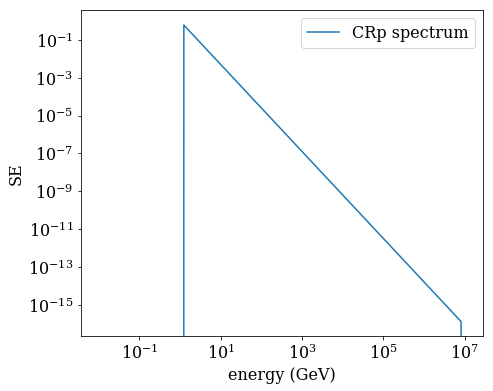

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(121)

energy, SE = clust.get_normed_crp_spectrum()
plt.loglog(energy, SE, label='CRp spectrum')

plt.xlabel('energy (GeV)')
plt.ylabel('SE')
plt.legend()

## Step 2: crp normalization
The norm!

In [6]:
clust._get_crp_normalization()

<Quantity [1.87376328e-10] 1 / (cm3 GeV)>

## Step 3: f(r) --> Density profile

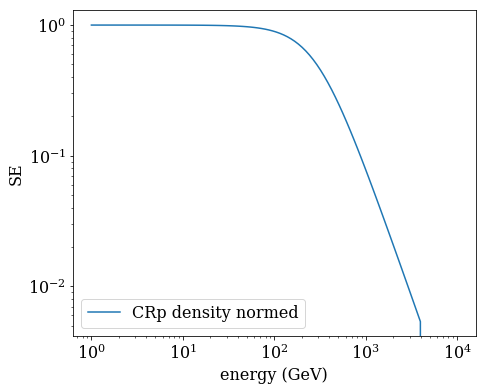

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(121)

rad, nd = clust.get_normed_density_crp_profile()
plt.loglog(rad, nd, label='CRp density normed')

plt.xlabel('energy (GeV)')
plt.ylabel('SE')
plt.legend()

## The 2D plot, spectra
- First gets the norm
- Gets normed density crp profile --> fr --> Some strange comment about integrating here? hoh? 
- Gets energy


In [8]:
from ClusterModel import model_tools
eng = model_tools.sampling_array(clust.Epmin, clust.Epmax, NptPd=clust._Npt_per_decade_integ, unit=True)


Getting the minimal proton energy
Getting the maximal proton energy


/home/astrogamma/.local/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


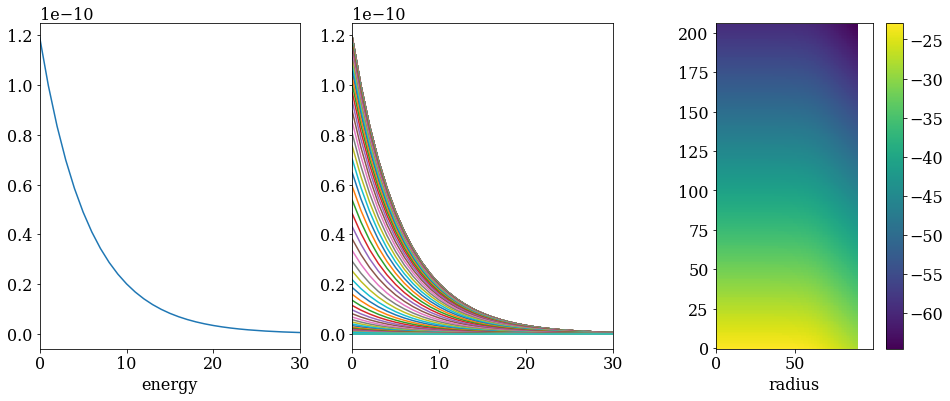

Getting the minimal proton energy
Getting the maximal proton energy


In [53]:
plt.figure(figsize=(15,6))
plt.subplot(131)
radius=np.logspace(0,4,100)*u.kpc
dndedv1 = clust.get_crp_2d(eng,radius[0])
plt.plot(dndedv1)
plt.xlim(0, 30)
plt.xlabel('energy')





plt.subplot(132)
dndedv = clust.get_crp_2d(eng,radius)
plt.plot(dndedv)
plt.xlim(0,30)

plt.subplot(133)
plt.imshow(np.log(dndedv.value), origin='lower')
plt.xlabel('radius')
plt.colorbar()
plt.show()


eng2 = model_tools.sampling_array(clust.Epmin*2 , clust.Epmax/3, NptPd=clust._Npt_per_decade_integ, unit=True)
dndedv2 = clust.get_crp_2d(eng2,radius)


## Integration of 2D

In [10]:
eng

<Quantity [1.21793392e+00, 1.31579629e+00, 1.42152202e+00, 1.53574293e+00,
           1.65914162e+00, 1.79245554e+00, 1.93648138e+00, 2.09207986e+00,
           2.26018085e+00, 2.44178896e+00, 2.63798947e+00, 2.84995493e+00,
           3.07895205e+00, 3.32634935e+00, 3.59362530e+00, 3.88237718e+00,
           4.19433060e+00, 4.53134983e+00, 4.89544894e+00, 5.28880383e+00,
           5.71376523e+00, 6.17287277e+00, 6.66887011e+00, 7.20472141e+00,
           7.78362897e+00, 8.40905241e+00, 9.08472933e+00, 9.81469766e+00,
           1.06033198e+01, 1.14553086e+01, 1.23757557e+01, 1.33701617e+01,
           1.44444694e+01, 1.56050989e+01, 1.68589864e+01, 1.82136251e+01,
           1.96771106e+01, 2.12581888e+01, 2.29663084e+01, 2.48116774e+01,
           2.68053239e+01, 2.89591622e+01, 3.12860638e+01, 3.37999346e+01,
           3.65157978e+01, 3.94498836e+01, 4.26197267e+01, 4.60442702e+01,
           4.97439796e+01, 5.37409649e+01, 5.80591126e+01, 6.27242283e+01,
           6.77641914e+01

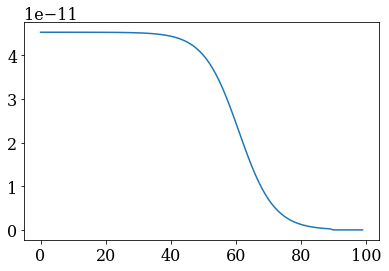

In [11]:
haha = model_tools.trapz_loglog(clust.get_crp_2d(eng2,radius), eng2, axis = 0 )
plt.plot(haha)

## Now do integration but use a function

In [12]:
def get_density_crp_profile2(cl, radius=np.logspace(0,4,100)*u.kpc,
                                Emin=None, Emax=None):
       

        # Define energy
        if Emin is None:
            Emin = cl._Epmin
        if Emax is None:
            Emax = cl._Epmax        
            
        # Integrate over the spectrum
        #eng = model_tools.sampling_array(Emin, Emax, NptPd=cl._Npt_per_decade_integ, unit=True)
        dN_dEdV = cl.get_crp_2d(eng, radius)

        #hah = model_tools.trapz_loglog(dndedv, eng, axis = 0)
        profile = (model_tools.trapz_loglog(dndedv, eng, axis=0)).to('cm-3')
            
        return radius, profile

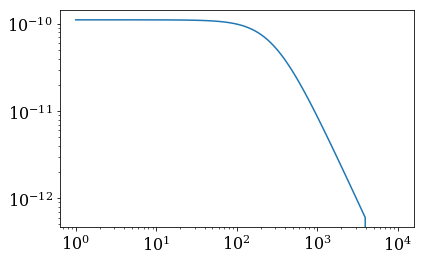

In [13]:
radius, lol = get_density_crp_profile2(clust)
plt.loglog(radius, lol)
plt.show()

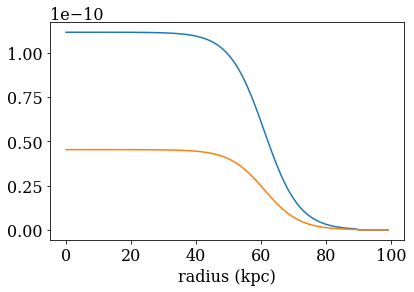

In [14]:
hah = model_tools.trapz_loglog(dndedv, eng, axis = 0)
plt.plot(hah)
plt.xlabel('radius (kpc)')

hah2 = model_tools.trapz_loglog(dndedv2, eng2, axis =0)
plt.plot(hah2)
plt.show()

# Primary Electrons
For the observable, gamma ray spectrum:
- Use the get_rate_synchrotron! 
- Use get_rate_ic
### First get a basic model though!
Thoughts: The basic power law isnt very good when I try to reproduce the radio spectra
- maybe a cutoff
- maybe a steepening, a change in index 

Refer to Sarazin paper

In [15]:
#Set some random stolen models for the primary electrons
clust.spectrum_cre1_model = {'name':   'PowerLaw', 'Index':2.3}
                             #'ExponentialCutoffPowerLaw','Index':3.3, 'CutoffEnergy':1e7*u.keV}
                           
                        
## You can try building a model incorporating the energy losses from sync and IC!


## For density you can just make the same as protons --> set it equal to the thermal gas 
clust.density_cre1_model = {'name': 'beta', 'n_0':3e-3*u.cm**-3, 'beta':2.0/3, 'r_c':290*u.kpc}

#pull out some random min and max energies
Eemin = clust.Epmin 
Eemax = clust.Epmax

Getting the minimal proton energy
Getting the maximal proton energy


### Trials with Electrons

In [16]:
clust.density_cre1_model
clust.Epmax

Getting the maximal proton energy


<Quantity 10. PeV>

## Simplest:
Basically rip off the simplest functions for protons, shamelessly use them
- Later you can try to reproduce the most low level ones like get generic profile!
- To cheat on how the hell electrons behave, look at the secondary electrons!!
- Also LOL rename those! They're like "hadronic origin electrons" or "secondary electrons" 


In [17]:
clust.density_cre1_model

{'beta': 0.6666666666666666,
 'n_0': <Quantity 0.003 1 / cm3>,
 'name': 'beta',
 'r_c': <Quantity 290. kpc>}

In [18]:
from ClusterModel import model_modpar

In [19]:
## Just use the avalialble generic functions

clust.density_cre1_model['n_0'] = 1.0 *u.adu

def get_normed_density_cre1_profile(cl = clust, rad = np.logspace(0,4,100)*u.kpc):
    
   # rad = model_tools.check_qarray(rad, unit = 'kpc')
    nr = cl._get_generic_profile(rad, cl.density_cre1_model)
    nr[rad > cl._R_truncation] *= 0 
    
    return rad, nr.to('adu')


def get_normed_spectrum_cre1(cl , en): 
    
    se = cl._get_generic_spectrum(en, cl.spectrum_cre1_model)
    se[en >Eemax] *= 0
    se[en <Eemin] *= 0
    
    return en, se*u.adu

In [20]:
radius=np.logspace(0,4,100)*u.kpc
energy=np.logspace(-2,7,100)*u.GeV

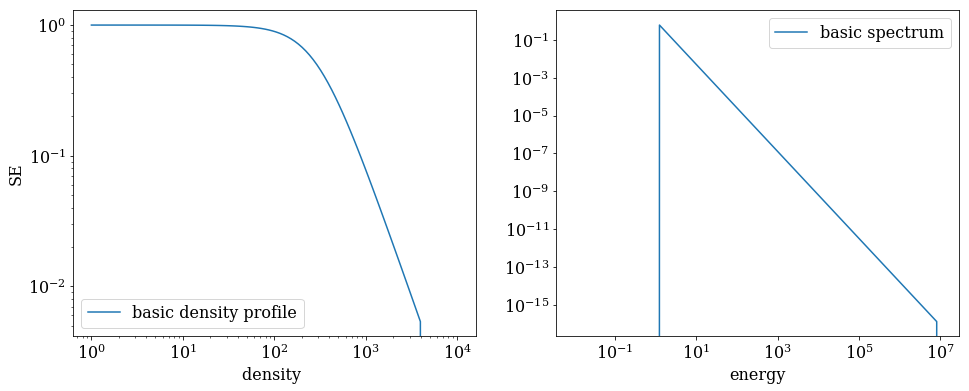

In [21]:
# The simplest plots: density profile and spectrum
plt.figure(figsize=(15,6))
plt.subplot(121)

a ,b = get_normed_density_cre1_profile(clust, radius)
plt.loglog(a,b, label='basic density profile')

plt.xlabel('density ')
plt.ylabel('SE')
plt.legend()


plt.subplot(122)
c, d = get_normed_spectrum_cre1(clust,energy)
plt.loglog(c,d,label = 'basic spectrum')
plt.xlabel('energy')
plt.legend()

#### Work on Norm


In [22]:
X_cre_E = 0.001 ## This is made up!!
rnorm = clust.R500
rmin = 1.0*u.kpc
def norm_electrons(cl):
    
    #Thermal energy of gas
    raduth, uth = cl.get_thermal_energy_profile(rnorm)
    
    #Spatial volume
    rad = model_tools.sampling_array(rmin, rnorm, NptPd=clust._Npt_per_decade_integ, unit=True)
    rad, fd = get_normed_density_cre1_profile(cl, rad)
    volcre = model_tools.trapz_loglog(4*np.pi*rad**2 * fd.to_value('adu'),rad)
    
    #Energy in spectrum
    eng = model_tools.sampling_array(Eemin , Eemax, NptPd=clust._Npt_per_decade_integ, unit=True)
    eng, fe = get_normed_spectrum_cre1(cl, eng)
    Integ_eng = model_tools.trapz_loglog( eng* fe.to_value('adu'), eng)
    

    #final
    norm = X_cre_E* uth /volcre / Integ_eng
    return norm.to('GeV-1 cm-3')
    

Getting R500 value


In [23]:
r = norm_electrons(clust)
r

<Quantity [1.87376328e-11] 1 / (cm3 GeV)>

In [24]:
clust._get_crp_normalization()

<Quantity [1.87376328e-10] 1 / (cm3 GeV)>

## 2D Spectrum

In [25]:
A = 1/u.GeV/u.cm**3

A.unit

def cre1_2d(cl = clust, en= np.logspace(-2,7,100)*u.GeV, rd =np.logspace(0,4,100)*u.kpc):
    
    #norm
    
    #norm_electrons(cl)
    #spatial
    rad, fd = get_normed_density_cre1_profile(cl, rd)
    fd2 = model_tools.replicate_array(fd.to_value('adu'), len(en), T = False )
    #energy
    eng, fe = get_normed_spectrum_cre1(cl, en)
    fe2 = model_tools.replicate_array(fe.to_value('adu'), len(rd), T = True )
    
    spectrum= A*fd2*fe2
     
    return spectrum.to('GeV-1 cm-3')




In [26]:
radius=np.logspace(0,4,100)*u.kpc
eng_try = model_tools.sampling_array(Eemin, Eemax, NptPd=clust._Npt_per_decade_integ, unit=True)
dndedv_try = cre1_2d(clust, eng_try,radius)

/home/astrogamma/.local/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


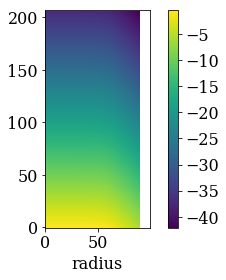

In [27]:
plt.imshow(np.log(dndedv_try.value), origin = 'lower')
plt.xlabel("radius")
plt.colorbar()

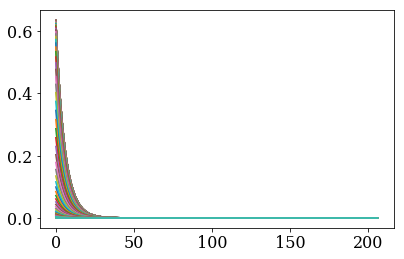

In [55]:
plt.plot(dndedv_try)
plt.show()

## Full spectrum

Text(0.5,0,'radius (kpc)')

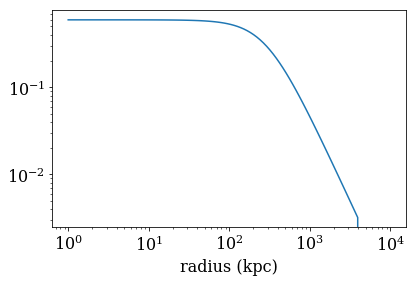

In [28]:
sad = model_tools.trapz_loglog(dndedv_try, eng_try, axis = 0).to('cm-3')
plt.loglog(radius,sad)
plt.xlabel('radius (kpc)')

# UNDERSTAND SYNCHROTRON 

## electron loss --> Can add to the power spectrum

In [29]:
# How about cluster electron loss?
from ClusterModel.ClusterTools import cluster_electron_loss as lo 
radius, B   = clust.get_magfield_profile(radius)
N_rad = len(radius)
N_eng = len(eng_try)
e_grid = (np.tile(eng_try, [N_rad,1])).T
B_grid = (np.tile(B, [N_eng, 1]))

   
loss = lo.dEdt_sync(e_grid, B_grid)
loss2 = loss.flatten()

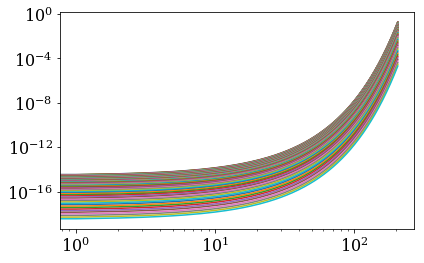

In [30]:
plt.loglog(loss)

plt.show()

## First: cluster electron emission, synchrotron!!

In [31]:
ener = np.logspace(-9,-2,100)*u.eV
radi = np.logspace(0,4,100)*u.kpc

In [32]:
from ClusterModel.ClusterTools import cluster_electron_emission as emi
radi, B   = clust.get_magfield_profile(radi)
def Je2( rad, eng): return cre1_2d(clust, eng*u.GeV, rad*u.kpc).to_value('GeV-1 cm-3').T

In [33]:
len(rad)

100

## 2D Spectra Comparison
Protons and secondary electrons being compared

In [56]:


noo = cre1_2d(clust, eng, radi).to_value('GeV-1 cm-3').T
noot = noo.T
yee_proton = clust.get_crp_2d(eng, radi).to_value('GeV-1 cm-3').T
yee_2electron = clust.get_cre_2d(eng, radi).to_value('GeV-1 cm-3').T


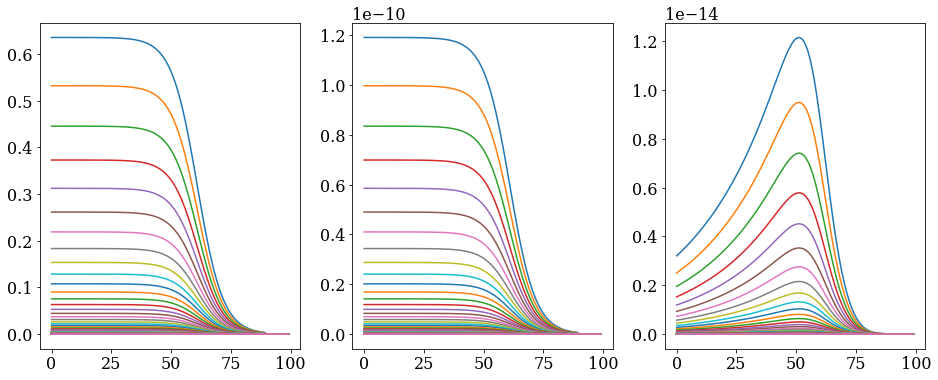

In [57]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(noo)

plt.subplot(132)
plt.plot(yee_proton)
#plt.imshow(np.log(noo), origin = "lower")

plt.subplot(133)
plt.plot(yee_2electron)
plt.show()

### Try manual for protons


In [36]:
def Je3( rad, eng): return clust.get_crp_2d( eng*u.GeV, rad*u.kpc).to_value('GeV-1 cm-3').T

In [37]:
mo3 =  emi.ClusterElectronEmission (Je = Je3,Eemin=(const.m_e*const.c**2).to('GeV'), NptEePd=clust._Npt_per_decade_integ)
protonmanual = mo3.synchrotron( ener, radius_input = radi, B=B).T

### jemanual uses synchrotron directly, but has the Je2 from my cre1_2d

In [38]:
mo2 = emi.ClusterElectronEmission (Je = Je2,Eemin=(const.m_e*const.c**2).to('GeV'), NptEePd=clust._Npt_per_decade_integ)

jemanual = mo2.synchrotron( ener, radius_input = radi, B=B).T

## helpme uses synchrotron method directly, acts like getratesynchrotron

In [39]:
def Je(rad, eng): return clust.get_cre_2d(eng*u.GeV, rad*u.kpc).to_value('GeV-1 cm-3').T
mo = emi.ClusterElectronEmission (Je,Eemin=(const.m_e*const.c**2).to('GeV'), NptEePd=clust._Npt_per_decade_integ)

radi, B   = clust.get_magfield_profile(radi)
helpme = mo.synchrotron( ener, radius_input = radi, B = B).T

### snyc uses get rate synchrotron, but inputs my values. default directly uses default
get rate synchrotron simply inputs some values into the model synchrotron

In [40]:
sync = clust.get_rate_synchrotron(energy = ener ,radius = radi)
# I don't understand the difference between these two 
# There is no difference! 


## default version
default = clust.get_rate_synchrotron()

## Compare jemanual, helpme, sync and default

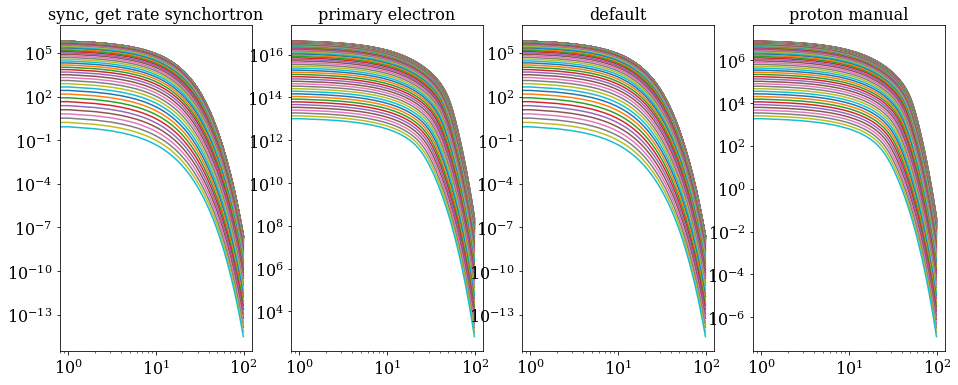

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.loglog(sync)
plt.title("sync, get rate synchortron")
            
plt.subplot(142)
plt.loglog(jemanual)
plt.title("primary electron")

plt.subplot(143)
plt.loglog(default)
plt.title("default")

plt.subplot(144)
plt.loglog(protonmanual)
plt.title("proton manual")
plt.show()

## Observed quantities:
Okay I finally get it. The emission.py thing is just like a class ehehe
* The basic function is synchotron rate. 
* It is used by the model obs, they integrate over it. spherical, cylindrical, los
   * synchrotron profile
   * synchrotron flux
   * synchrotron map
   * synchrotron spectrum

## Now integrate the above value to get random plots & see the issues
Use jemanuel, the most manually made one

In [42]:
# Straight up spherical integration! Similar to get_synchrotron_spectrum
dN_dEdt = model_tools.spherical_integration(helpme, radi)
dN_dEdtnew = model_tools.spherical_integration( jemanual, radi)
dnprotons = model_tools.spherical_integration( protonmanual, radi)

Text(0.5,1,'protons')

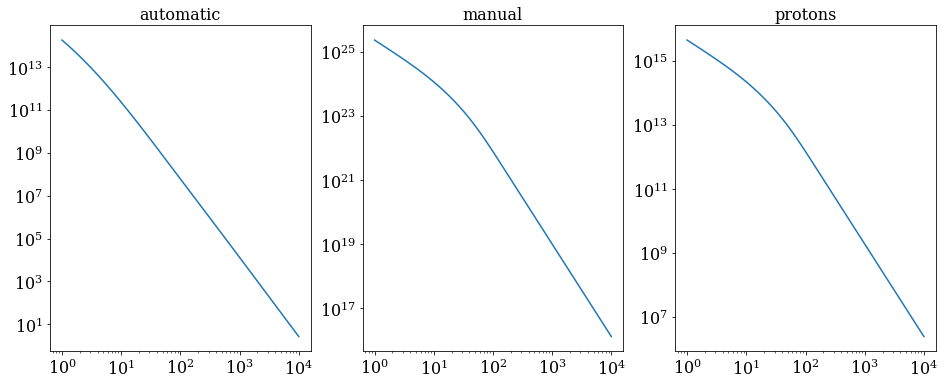

In [43]:
plt.figure(figsize = (15,6))

plt.subplot(131)
plt.loglog(radi, dN_dEdt)
plt.title("automatic")

plt.subplot(132)
plt.loglog(radi, dN_dEdtnew)
plt.title("manual")

plt.subplot(133)
plt.loglog(radi, dnprotons)
plt.title("protons")


## Replicate the spectrum

In [44]:
## Luminosity
# D lumin? 

Dlum    = clust._cosmo.luminosity_distance(clust._redshift)

In [45]:
DN_dEdtdS = dN_dEdt/(4*np.pi*Dlum**2)
DN_dEdtnew_dS = dN_dEdtnew/(4*np.pi*Dlum**2)
dnprotonsds = dnprotons/(4*np.pi*Dlum**2)
freq = (ener/const.h).to('GHz')

spec_help = (DN_dEdtdS* ener**2 / freq).to('Jy')
spec_man = (DN_dEdtnew_dS* ener**2 / freq).to('Jy')
spec_pro = (dnprotonsds* ener**2 / freq).to('Jy')

In [65]:
freq

<Quantity [2.41798926e-04, 2.84551866e-04, 3.34864038e-04, 3.94072002e-04,
           4.63748642e-04, 5.45744945e-04, 6.42239174e-04, 7.55794736e-04,
           8.89428279e-04, 1.04668983e-03, 1.23175710e-03, 1.44954648e-03,
           1.70584362e-03, 2.00745717e-03, 2.36239959e-03, 2.78010007e-03,
           3.27165499e-03, 3.85012270e-03, 4.53087041e-03, 5.33198245e-03,
           6.27474068e-03, 7.38418983e-03, 8.68980285e-03, 1.02262639e-02,
           1.20343895e-02, 1.41622134e-02, 1.66662621e-02, 1.96130564e-02,
           2.30808792e-02, 2.71618545e-02, 3.19643950e-02, 3.76160821e-02,
           4.42670550e-02, 5.20939995e-02, 6.13048412e-02, 7.21442699e-02,
           8.49002391e-02, 9.99116162e-02, 1.17577184e-01, 1.38366236e-01,
           1.62831040e-01, 1.91621514e-01, 2.25502488e-01, 2.65374023e-01,
           3.12295322e-01, 3.67512868e-01, 4.32493536e-01, 5.08963562e-01,
           5.98954403e-01, 7.04856700e-01, 8.29483790e-01, 9.76146438e-01,
           1.14874080e+00

## Plot three spectra

Text(0.5,1,'Manual')

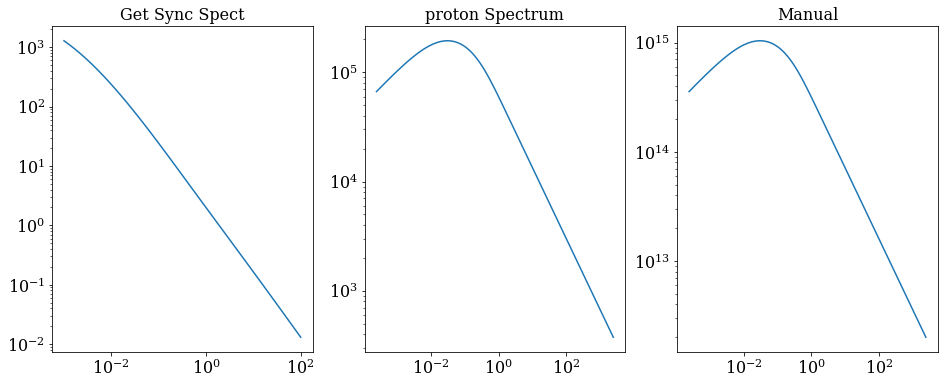

In [46]:

plt.figure(figsize = (15,6))
plt.subplot(131)
### Automatic function
frequency, readyspectrum = clust.get_synchrotron_spectrum()
plt.loglog(frequency,readyspectrum)
plt.title("Get Sync Spect")

plt.subplot(132)
plt.loglog(freq, spec_pro)
plt.title("proton Spectrum")

plt.subplot(133)
plt.loglog(freq, spec_man)
plt.title("Manual")

## Time for completely manual synchrotron


In [47]:
from scipy.special import cbrt

NptEePd=100   
        # Check electron energy
Ee = np.logspace(np.log10(Eemin.value), np.log10(Eemax.value), int(NptEePd*(np.log10(Eemax.value/Eemin.value))))


Eemin=(const.m_e*const.c**2).to('GeV')

Ephoton = ener



def Gtilde( x):
        """
        Useful equation. Aharonian, Kelner, Prosekin 2010 Eq. D7
        Taken from Naima.
        
        Factor ~2 performance gain in using cbrt(x)**n vs x**(n/3.)
        Invoking crbt only once reduced time by ~40%
        """
        cb = cbrt(x) # x**1/3
        gt1 = 1.808 * cb / np.sqrt(1 + 3.4 * cb ** 2.0)
        gt2 = 1 + 2.210 * cb ** 2.0 + 0.347 * cb ** 4.0
        gt3 = 1 + 1.353 * cb ** 2.0 + 0.217 * cb ** 4.0
        
        return gt1 * (gt2 / gt3) * np.exp(-x)
    
    
 

In [48]:
   
    
# 1D
gamma = (Ee/(const.m_e*const.c**2).to_value('GeV')) # 1D

ampli = np.sqrt(3)/(8*np.pi**2)*(const.e.value*const.e.unit)**3/(const.eps0*const.m_e*const.c*const.hbar)
    
Bfield = 1.0*u.uG
#Ephoton = ener
func = ampli * Bfield / Ephoton
        
            # Get the critical energy and energy ratio
Ec = (3.0/2)*(gamma**2)*const.e.value*const.e.unit*Bfield*const.hbar / (const.m_e) # 1D: Eelec
EphotEc = Ephoton.to_value('GeV') / np.vstack(Ec.to_value('GeV')) # 2D: photon energy, electron energy

            # Compute integrand
dNphot_dEdt = func * Gtilde(EphotEc)
        
            # Integrate over electron energy
        # I CASUALLY EMITTED J COMPLETELY!
DNeDEDV = cre1_2d(clust, ener, radi).T

#dNphot_dEdt = model_tools.trapz_loglog( DNeDEDV*dNphot_dEdt, Ee*u.GeV, axis=0)


# Coma Data

In [49]:

clust.pressure_gas_model = {'name':'GNFW', 'P_0':2.2e-2*u.keV/u.cm**3,'a':1.8,'b':3.1,'c':0.0,'c500':2.9}

clust.density_gas_model = {'name':'beta', 'beta':2.0/3, 'r_c':290*u.kpc, 'n_0':3e-3*u.cm**-3}

# Radio total flux [Thierbach et al (2003)]:

dat_freq = np.array([30.9,43,73.8,151,326,408,430,608.5,1380,1400,2675,2700,4850])*u.MHz
dat_flux = np.array([49,51,17,7.2,3.81,2.0,2.55,1.2,0.53,0.64,0.11,0.07,0.03])*u.Jy
dat_err  = np.array([10,13,12,0.8,0.03,0.2,0.28,0.3,0.05,0.035,0.03,0.02,0.01])*u.Jy


Setting pressure_gas_model value
Fixing: R500
Setting density_gas_model value
Fixing: R500


In [60]:
dat_freq_ghz = dat_freq.to('GHz')
dat_freq_ghz

<Quantity [0.0309, 0.043 , 0.0738, 0.151 , 0.326 , 0.408 , 0.43  , 0.6085,
           1.38  , 1.4   , 2.675 , 2.7   , 4.85  ] GHz>

## Plot Coma Data

Text(0.5,1,'Get Sync Spect')

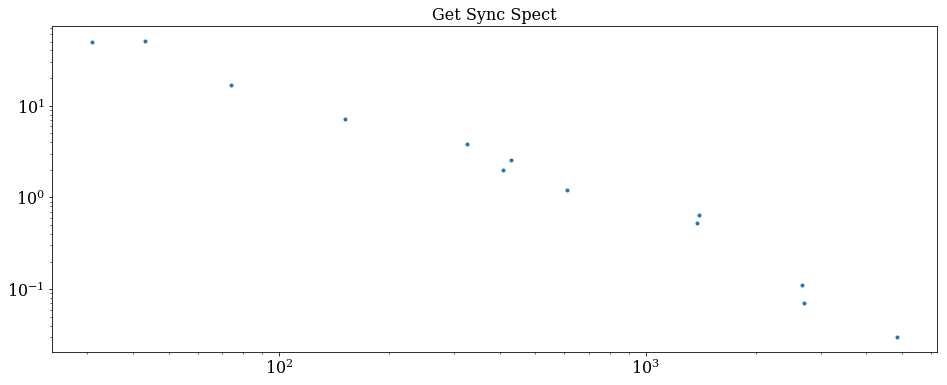

In [50]:
plt.figure(figsize = (15,6))

plt.loglog(dat_freq,dat_flux,".")
plt.title("Get Sync Spect")

## Plot Generic 2ndary Population Spectrum

In [51]:
frequency = np.logspace(-3, 2, 100)*u.GHz
radius = np.logspace(0, 4, 100)*u.kpc

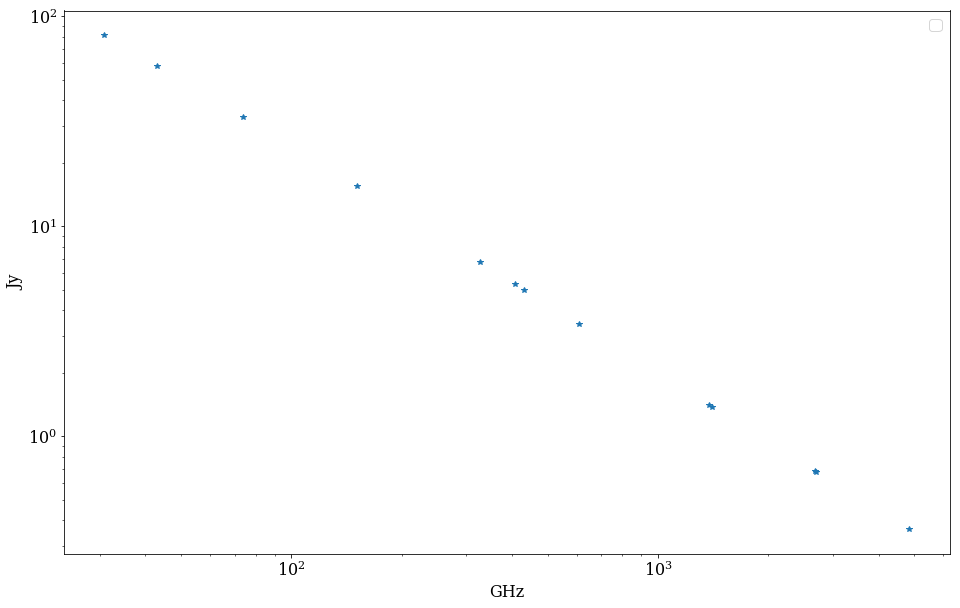

In [52]:
bid, s1 = clust.get_synchrotron_spectrum(dat_freq, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=False)


plt.figure(1, figsize=(15,10))
plt.loglog(dat_freq, s1, "*")
plt.xlabel(frequency.unit)
plt.ylabel((s1).unit)
plt.legend()

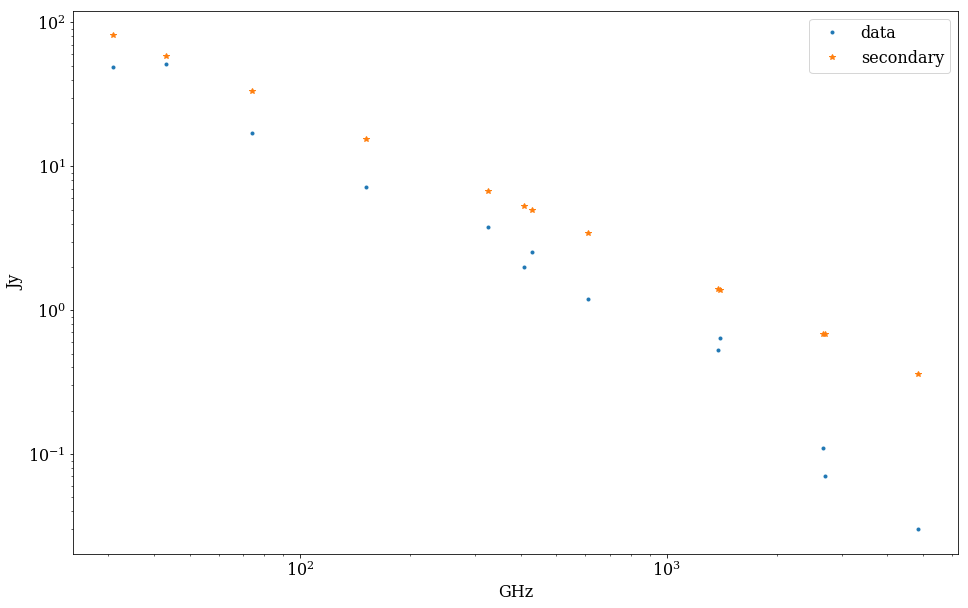

In [64]:
plt.figure(figsize =(15,10))
#plt.subplot(121)
plt.loglog(dat_freq,dat_flux,".", label = "data")

#plt.subplot(122)
plt.loglog(dat_freq, s1, "*", label = "secondary")
plt.xlabel(frequency.unit)
plt.ylabel((s1).unit)
plt.legend()
plt.show()




## Notes:
The Secondary electron population seems to account for most of it, but gets flatter; 
- next step is to fit the primary electron population